Importing the Libraries 

In [10]:

import pandas as pd
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Cell 2: Load Dataset

In [12]:

df = pd.read_csv("animal_disease_dataset.csv")
print(df.head())
df.tail()



    Animal  Age  Temperature         Symptom 1         Symptom 2  \
0      cow    3        103.1        depression    painless lumps   
1  buffalo   13        104.5    painless lumps  loss of appetite   
2    sheep    1        100.5        depression    painless lumps   
3      cow   14        100.3  loss of appetite  swelling in limb   
4    sheep    2        103.6    painless lumps  loss of appetite   

          Symptom 3      Disease  
0  loss of appetite    pneumonia  
1        depression  lumpy virus  
2  loss of appetite  lumpy virus  
3   crackling sound     blackleg  
4        depression    pneumonia  


,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
43773,goat,9,102.2,swelling in muscle,lameness,crackling sound,blackleg
43774,buffalo,3,101.8,loss of appetite,sores on mouth,difficulty walking,foot and mouth
43775,buffalo,15,104.1,swelling in extremities,chills,shortness of breath,anthrax
43776,cow,9,104.9,crackling sound,lameness,swelling in muscle,blackleg
43777,buffalo,4,103.5,difficulty walking,sores on gums,loss of appetite,foot and mouth


# Cell 3: Data Summary

In [13]:

print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)


Shape: (43778, 7)

Missing values:
 Animal         0
Age            0
Temperature    0
Symptom 1      0
Symptom 2      0
Symptom 3      0
Disease        0
dtype: int64

Data types:
 Animal          object
Age              int64
Temperature    float64
Symptom 1       object
Symptom 2       object
Symptom 3       object
Disease         object
dtype: object


# Cell 4: Remove Outliers (IQR Method)


 Checking for outliers in column: Temperature


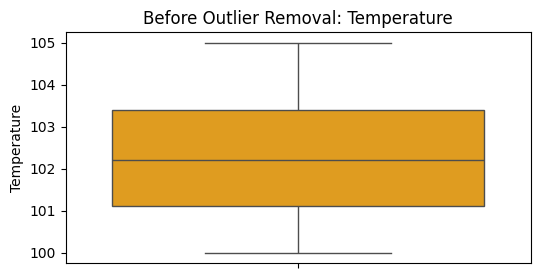

📉 Removed 0 outliers from 'Temperature'


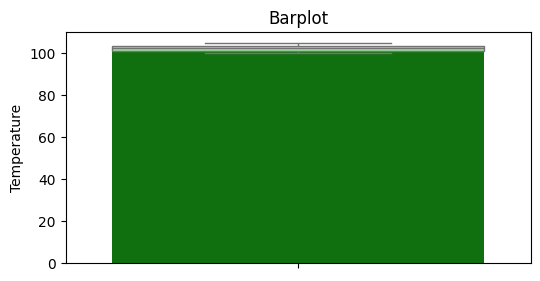


 Checking for outliers in column: Age


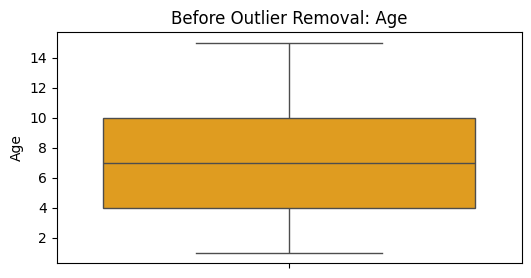

📉 Removed 0 outliers from 'Age'


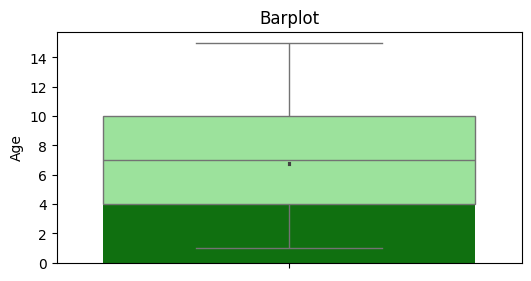


✅ Final data shape after outlier removal: (43778, 7)


In [14]:

"""def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

df = remove_outliers_iqr(df, 'Temperature')
df = remove_outliers_iqr(df, 'Age')
print("Data shape after outlier removal:", df.shape)"""

# Function to remove outliers using IQR and visualize changes
def remove_outliers_iqr(data, column):
    print(f"\n Checking for outliers in column: {column}")
    
    # Plot before removal
    plt.figure(figsize=(6, 3))
    sns.boxplot(y=data[column], color='orange')
    plt.title(f'Before Outlier Removal: {column}')
    plt.show()
    
    # IQR Calculation
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    original_count = data.shape[0]
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    new_count = data.shape[0]
    removed = original_count - new_count
    print(f"📉 Removed {removed} outliers from '{column}'")

    # Plot after removal
    plt.figure(figsize=(6, 3))
    sns.boxplot(y=data[column], color='lightgreen')
    plt.title(f'After Outlier Removal: {column}')
    sns.barplot(y=data[column], color='green')
    plt.title(f'Barplot')
    plt.show()

    return data

df = remove_outliers_iqr(df, 'Temperature')
df = remove_outliers_iqr(df, 'Age')

print("\n✅ Final data shape after outlier removal:", df.shape)



In [15]:
# Cell 5: Label Encoding
label_encoders = {}
for col in ['Animal', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Disease']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [16]:

# Cell 6: Define Features and Labels
from sklearn.model_selection import train_test_split
X = df[['Animal', 'Age', 'Temperature', 'Symptom 1', 'Symptom 2', 'Symptom 3']]
y = df['Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # type: ignore
X_test_scaled = scaler.transform(X_test)


svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_scaled, y_train)


log_model = LogisticRegression(max_iter=500, solver='liblinear')
log_model.fit(X_train_scaled, y_train)




In [ ]:
# Cell 8: Evaluate Models
def evaluate_model(model, name):
    y_pred = model.predict(X_train_scaled)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, output_dict=False)
    
    print(f"--- {name} ---")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

evaluate_model(svm_model, "SVM Model")
evaluate_model(log_model, "Logistic Regression Model")


In [ ]:
# Cell 9: Disease Prediction Function
def predict_disease(model, animal, age, temp, s1, s2, s3):
    try:
        input_data = pd.DataFrame([{
            'Animal': label_encoders['Animal'].transform([animal])[0],
            'Age': age,
            'Temperature': temp,
            'Symptom 1': label_encoders['Symptom 1'].transform([s1])[0],
            'Symptom 2': label_encoders['Symptom 2'].transform([s2])[0],
            'Symptom 3': label_encoders['Symptom 3'].transform([s3])[0],
        }])
        pred_code = model.predict(input_data)[0]
        prediction = label_encoders['Disease'].inverse_transform([pred_code])[0]
        return prediction
    except Exception as e:
        return f"Error: {str(e)}"


In [ ]:
# Cell 10: Example Predictions
example_1 = predict_disease(svm_model, "cow", 5, 102.3, "depression", "painless lumps", "loss of appetite")
example_2 = predict_disease(log_model, "buffalo", 13, 104.5, "painless lumps", "loss of appetite", "depression")

print("SVM Predicted Disease:", example_1)
print("Logistic Regression Predicted Disease:", example_2)
